In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [123]:

df = pd.read_csv('verify2.csv', delimiter=';')
df.fillna(0, inplace=True)

In [124]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,ROSES,14421,30,14420.0,42.0,0.0,0.0,14422,72,0.0,0.0,0.0,0.0,14421.5,0.0
1,2,0,STRAWBERRIES,4036,181,0.0,0.0,0.0,0.0,4037,181,0.0,0.0,0.0,0.0,4036.5,0.0
2,2,0,AMETHYSTS,9996,2,9995.0,25.0,0.0,0.0,10004,2,10005.0,25.0,0.0,0.0,10000.0,0.0
3,2,0,ORCHIDS,1053,7,1052.0,2.0,1046.0,46.0,1059,7,1060.0,2.0,1067.0,46.0,1056.0,0.0
4,2,0,STARFRUIT,5023,1,5022.0,27.0,0.0,0.0,5029,27,0.0,0.0,0.0,0.0,5026.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2,99900,AMETHYSTS,9998,3,9996.0,1.0,9995.0,20.0,10004,1,10005.0,20.0,0.0,0.0,10001.0,1104.0
6996,2,99900,STRAWBERRIES,4042,274,0.0,0.0,0.0,0.0,4044,274,0.0,0.0,0.0,0.0,4043.0,0.0
6997,2,99900,STARFRUIT,5011,7,5010.0,21.0,0.0,0.0,5017,21,0.0,0.0,0.0,0.0,5014.0,624.0
6998,2,99900,ROSES,14405,64,0.0,0.0,0.0,0.0,14407,64,0.0,0.0,0.0,0.0,14406.0,212.0


In [125]:
df.columns.to_list()

['day',
 'timestamp',
 'product',
 'bid_price_1',
 'bid_volume_1',
 'bid_price_2',
 'bid_volume_2',
 'bid_price_3',
 'bid_volume_3',
 'ask_price_1',
 'ask_volume_1',
 'ask_price_2',
 'ask_volume_2',
 'ask_price_3',
 'ask_volume_3',
 'mid_price',
 'profit_and_loss']

## Graph: Time vs Profit
Graph the amount of profit made from each product, over the time periods 0 - 200,0000. 

Time period increments are 100, so 2000 data points for each product.

Text(0, 0.5, 'Profits')

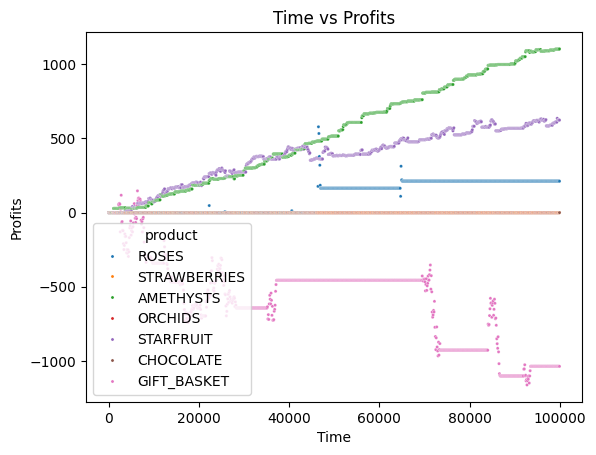

In [126]:

sns.scatterplot(data=df, x='timestamp', y='profit_and_loss', hue='product', s = 5)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')

Text(0, 0.5, 'Profits')

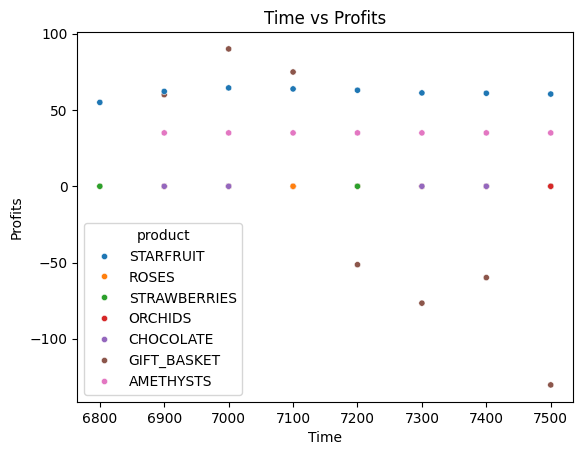

In [127]:
sns.scatterplot(data=df.loc[480:530], x='timestamp', y='profit_and_loss', hue='product', s = 20)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')

Text(0, 0.5, 'Profits')

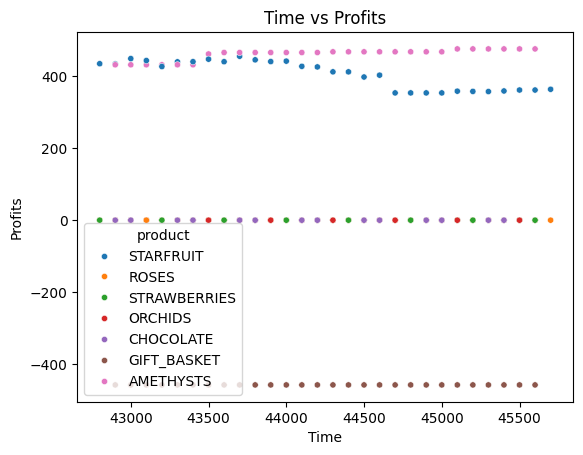

In [128]:
sns.scatterplot(data=df.loc[3000:3200], x='timestamp', y='profit_and_loss', hue='product', s = 20)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')

Text(0, 0.5, 'Profits')

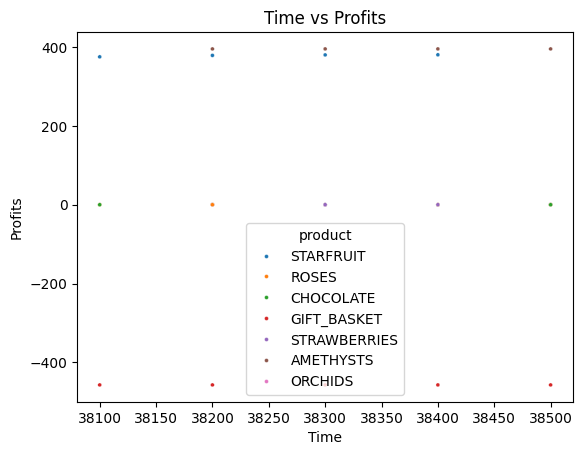

In [129]:
sns.scatterplot(data=df.loc[2670:2700], x='timestamp', y='profit_and_loss', hue='product', s = 8)
plt.title('Time vs Profits')
plt.xlabel('Time')
plt.ylabel('Profits')

Text(0, 0.5, 'Mid Price')

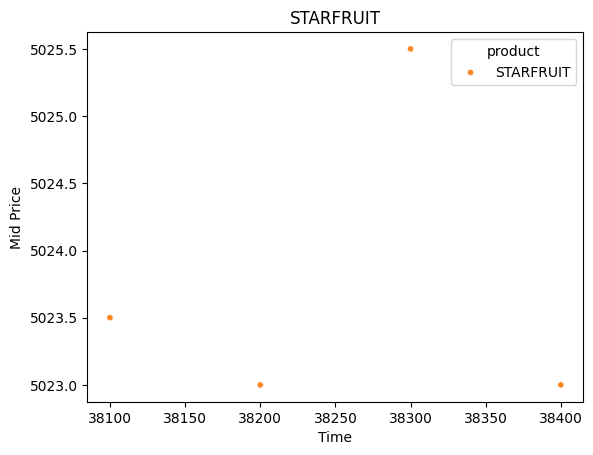

In [130]:
# We went short at 133700 for 20 star fruit
# Then at 133800 we lose money (544.1975 --> 472)
# That means if we lost money, that means I would expect the price of Starfruit to increase 
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].loc[2670:2700], x='timestamp', y='mid_price', hue='product', s = 20, palette=['#fa8825'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')

## Graph: Time vs Midprice

Text(0, 0.5, 'Mid Price')

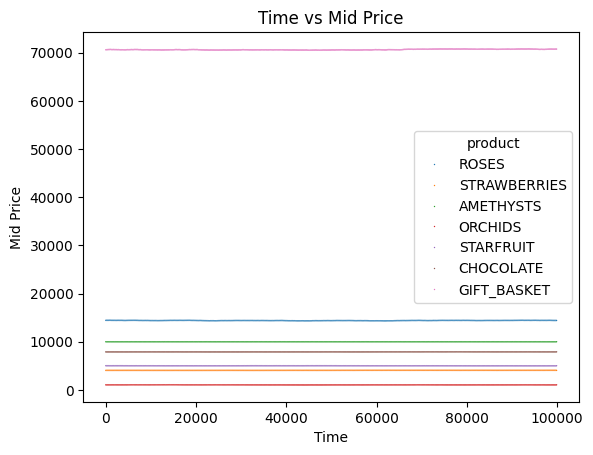

In [131]:
sns.scatterplot(data=df, x='timestamp', y='mid_price', hue='product', s = 1)
plt.title('Time vs Mid Price')
plt.xlabel('Time')
plt.ylabel('Mid Price')

Text(0, 0.5, 'Mid Price')

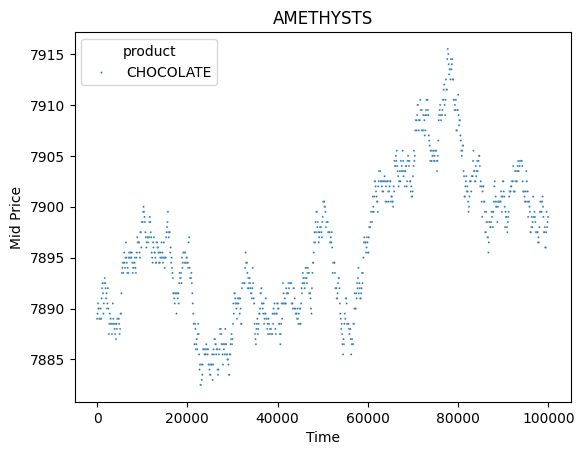

In [132]:
sns.scatterplot(data=df[df['product'] == 'CHOCOLATE'], x='timestamp', y='mid_price', hue='product', s = 2)
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.ylabel('Mid Price')

Text(0, 0.5, 'Mid Price')

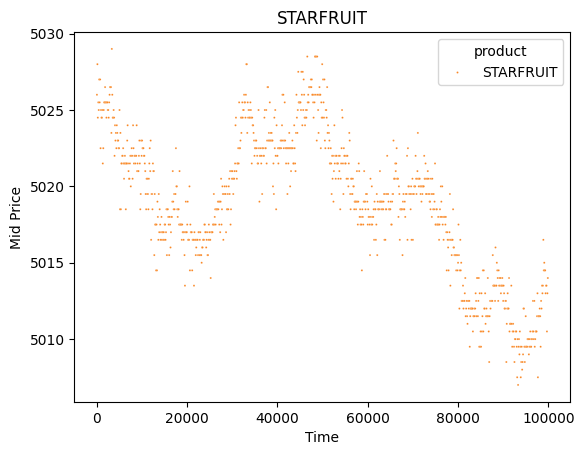

In [133]:
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#fa8825'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.ylabel('Mid Price')

In [134]:
def find_average(row):
    return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
 row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                  row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])


df['avg_price'] = df.apply(find_average, axis=1)

In [135]:
print(sum([df.loc[3995, 'bid_volume_1'], df.loc[3995, 'bid_volume_2'], df.loc[3995, 'bid_volume_3'], df.loc[3995, 'ask_volume_1'], df.loc[3995, 'ask_volume_2'], df.loc[3995, 'ask_volume_3']]))

128.0


In [136]:
df[df['product'] == 'STARFRUIT'].to_csv('starfruit_my_trades.csv', index = False)

In [137]:
df.replace(0, np.nan, inplace=True)

In [138]:
lowest_ask = df[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1)

highest_bid = df[["bid_price_1", "bid_price_2", "bid_price_3"]].min(axis=1)

spread = lowest_ask - highest_bid

df['spread'] = spread

Text(0, 0.5, 'Price')

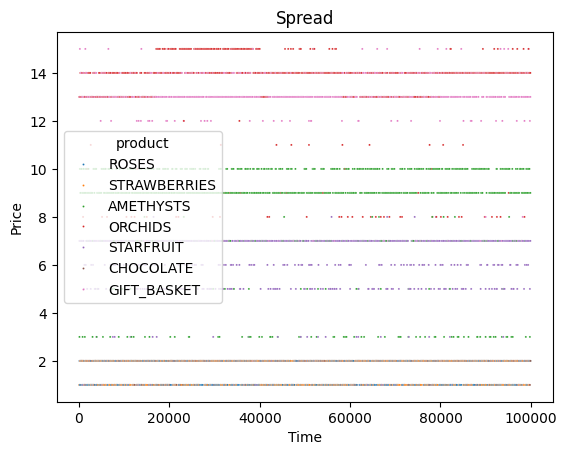

In [139]:
sns.scatterplot(data=df, x='timestamp', y='spread', hue='product', s = 2)
plt.title('Spread')
plt.xlabel('Time')
plt.ylabel('Price')

## Finding EMA

In [140]:


def calculate_ema(col_name: str, time = 3):
    for product in df['product'].unique():
        df[col_name + f"_{product}"] = df[df['product'] == str(product)]['mid_price'].ewm(span = time, adjust = False).mean()
    # return df[df['product'] == product]


In [141]:
# df_star = calculate_ema(product= "STARFRUIT", col_name="ema3")
calculate_ema(col_name="ema3", time=3)
calculate_ema(col_name="ema7", time=7)
calculate_ema(col_name="ema20", time=20)
calculate_ema(col_name="ema100", time=100)

Text(0, 0.5, 'PRICE')

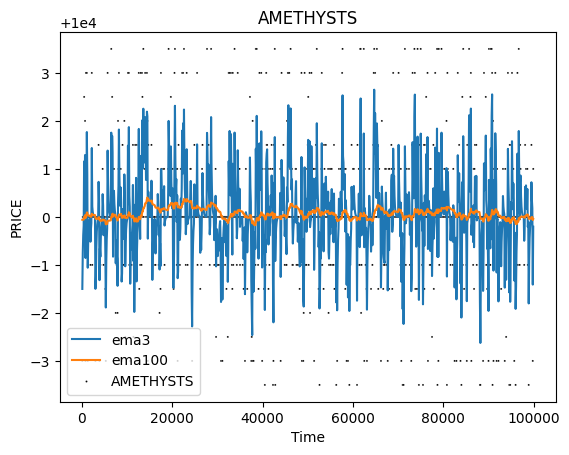

In [142]:
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema3_AMETHYSTS', label='ema3')
sns.lineplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='ema100_AMETHYSTS', label='ema100')
sns.scatterplot(data=df[df['product'] == 'AMETHYSTS'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 2, palette=['#000000'])
plt.title('AMETHYSTS')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

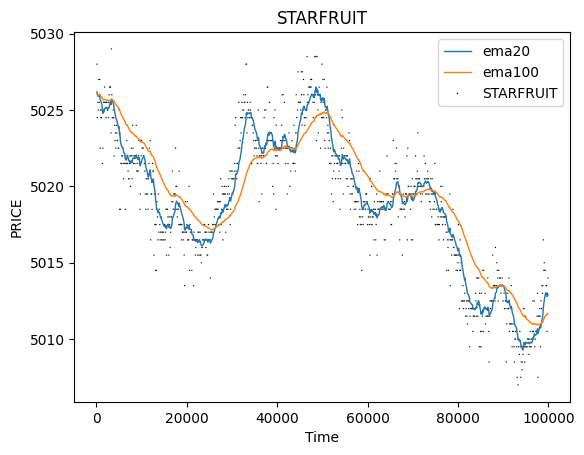

In [143]:
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema20_STARFRUIT', label='ema20', linewidth=1)
sns.lineplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='ema100_STARFRUIT', label='ema100', linewidth=1)
sns.scatterplot(data=df[df['product'] == 'STARFRUIT'].iloc[:2000], x='timestamp', y='mid_price', hue='product', s = 1, palette=['#000000'])
plt.title('STARFRUIT')
plt.xlabel('Time')
plt.legend()
plt.ylabel('PRICE')

![Image Title](screenshots/test1.png)